# Olympics Medal Analysis
this is one of the projects in the series of projects that i am building in order to strengthen my concepts in the ML

## importing the libraries and modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### loading the dataset

In [ ]:
df=pd.read_csv('data/Athletes_summer_games.csv')

In [4]:
df.head(10)

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
5,27,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
6,29,"Einar Ferdinand ""Einari"" Aalto",M,26.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
7,31,Jyri Tapani Aalto,M,31.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN
8,32,Minna Maarit Aalto,F,30.0,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN
9,33,Minna Maarit Aalto,F,34.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN


In [6]:
df.shape

(237673, 13)

In [7]:
df.columns.tolist()

['Unnamed: 0',
 'Name',
 'Sex',
 'Age',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237673 entries, 0 to 237672
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  237673 non-null  int64  
 1   Name        237673 non-null  object 
 2   Sex         237673 non-null  object 
 3   Age         228484 non-null  float64
 4   Team        237673 non-null  object 
 5   NOC         237673 non-null  object 
 6   Games       237673 non-null  object 
 7   Year        237673 non-null  int64  
 8   Season      237673 non-null  object 
 9   City        237673 non-null  object 
 10  Sport       237673 non-null  object 
 11  Event       237673 non-null  object 
 12  Medal       36537 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 23.6+ MB


## Basic Data Cleaning

Drop the first column unnamed : 0 as its just an index in the csv and we dont need it here

In [ ]:
df=df.drop(columns=['Unnamed: 0'])

 we are focused on the summer olympics in this project therefore we will keep only the details of the summer olympics

In [ ]:
df=df[df['Season']=='Summer']

From the dataset its clear that there are some players with no medals. As we are interested in findings of the medals therefore making a new dataframe containing only the players having the medals

In [13]:
df_medals=df.dropna(subset=['Medal'])

In [15]:
#comparing the old dataset and the new cleaned dataset
print(df.shape)
print(df_medals.shape)

(237673, 12)
(36537, 12)


In [16]:
df_medals.head(4)

,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
12,Arvo Ossian Aaltonen,M,30.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
13,Arvo Ossian Aaltonen,M,30.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
15,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


## Visualizing the data
Let's make a graph to look for the top 10 counteries having the higest number of medals(silver ,bronze ,gold)

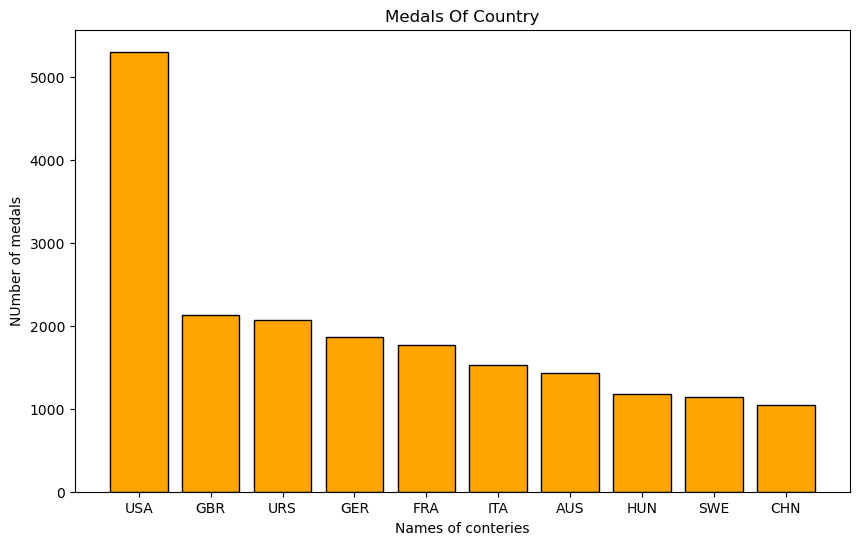

In [28]:
medals_of_country=df_medals.value_counts(['NOC']).head(10)
#in this particular case bar graph is the best choice
countries=[item[0] for item in medals_of_country.index]
plt.figure(figsize=(10,6))
plt.bar(countries,medals_of_country.values,color='orange',edgecolor='black')
plt.title('Medals Of Country')
plt.xlabel('Names of conteries')
plt.ylabel('NUmber of medals')
plt.savefig('top_10_countries_medals.png', dpi=300, bbox_inches='tight')

plt.show()

In the above graph the medals shown are the total medals won by any country like if USA has won a basketball match and it has 12 players then that medal is conted 12 times as there are 12 enteries for the team i.e a separate row for each player

To count the actual number of medals I am going to the following actions

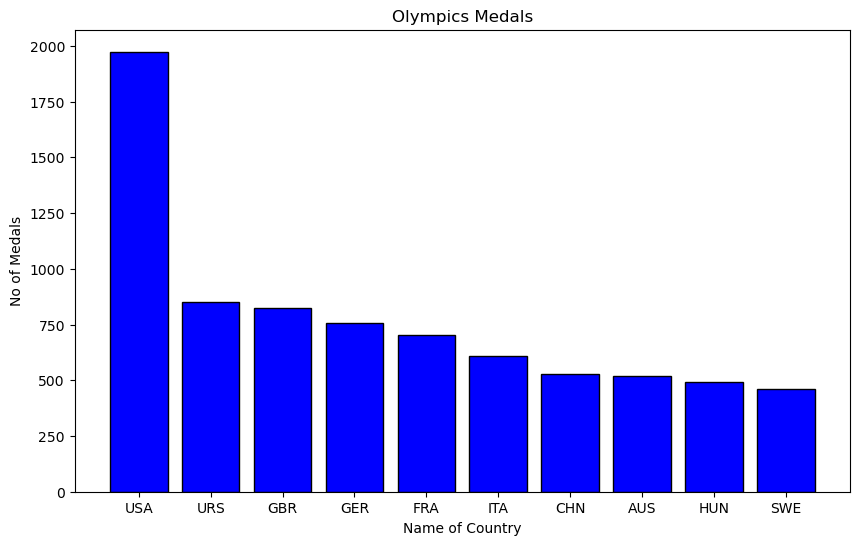

In [34]:
actual_medals=df_medals.drop_duplicates(subset=['Year','Event','NOC'])['NOC'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.bar(actual_medals.index,actual_medals.values,color='blue',edgecolor='black')
plt.title('Olympics Medals')
plt.xlabel('Name of Country')
plt.ylabel('No of Medals')
plt.savefig('top_10_counteries_actual_medals.png',dpi=300,bbox_inches='tight')
plt.show()

## Medals By Gender

In this section is the comparison  of the medals won by female and and male athletes

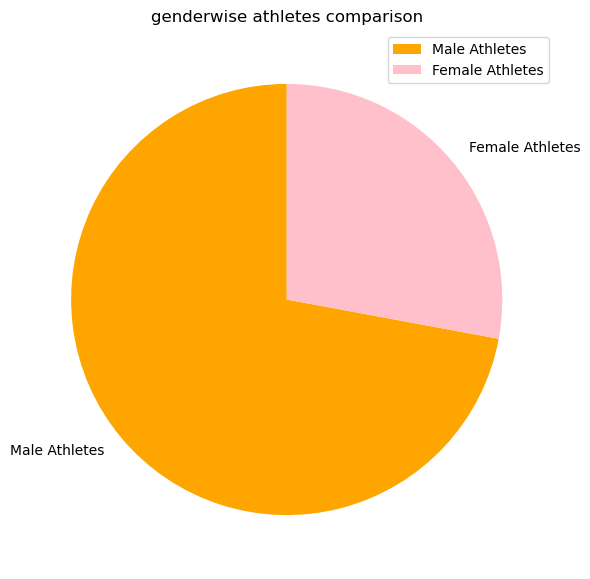

In [47]:
# counting the number of male athletes
male_athletes=df_medals[df_medals['Sex']=='M']['Name'].nunique()
# counting the number of female athletes
female_athletes=df_medals[df_medals['Sex']=='F']['Name'].nunique()
values=[male_athletes,female_athletes]
label=['Male Athletes','Female Athletes']
plt.figure(figsize=(7,7))
plt.pie(values,labels=label,startangle=90,colors=['orange','pink'])
plt.title('genderwise athletes comparison')
plt.legend()
plt.savefig('plots/genderwise_comparison_of_athletes.png',dpi=300,bbox_inches='tight')
plt.show()


## Medals By Year
This section is dedicated for the analysis of how the number of medals is changed over the years

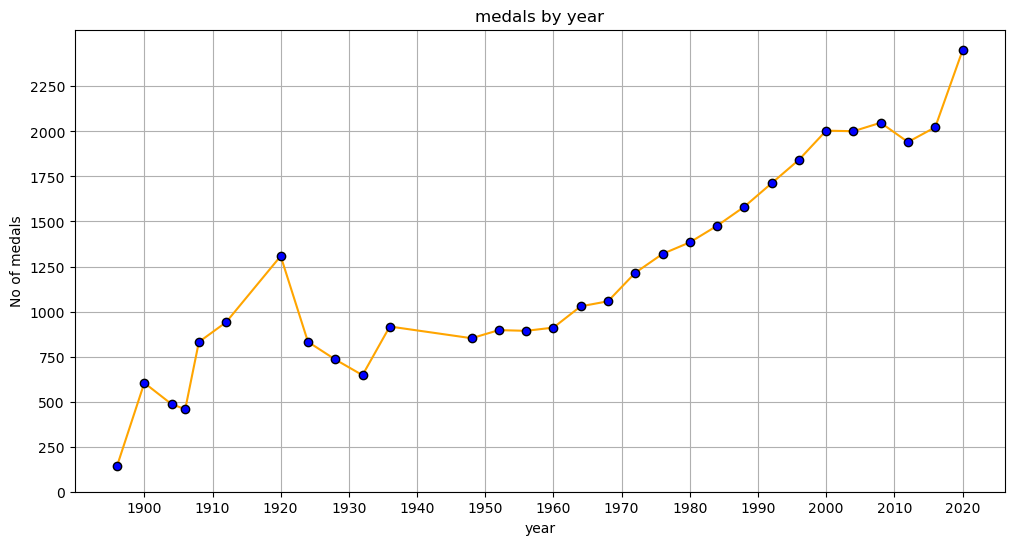

In [64]:
medals_by_year=df_medals['Year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.plot(medals_by_year.index,medals_by_year.values,marker='o',color='orange',linestyle='solid',mec='black',mfc='blue')
plt.title('medals by year')
plt.xticks(np.arange(1900,2030,10))
plt.yticks(np.arange(0,2500,250))
plt.xlabel('year')
plt.ylabel('No of medals')
plt.grid()
plt.savefig('plots/medals_by_year.png',dpi=300,bbox_inches='tight')
plt.show()

## Top Sports by Medal Count

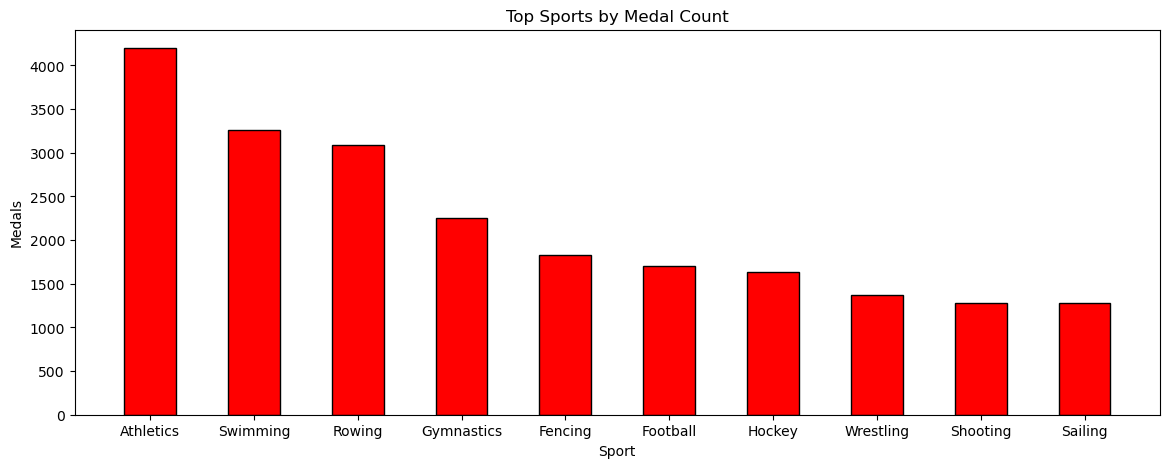

In [70]:
top_sports=df_medals['Sport'].value_counts().head(10)
plt.figure(figsize=(14,5))
plt.bar(top_sports.index,top_sports.values,width=0.5,color='red',edgecolor='black')
plt.title('Top Sports by Medal Count')
plt.xlabel('Sport')
plt.ylabel('Medals')
plt.savefig('plots/top_sports_by_medal_count.png',dpi=350,bbox_inches='tight')
plt.show()

## Age Distribution of the Medalists

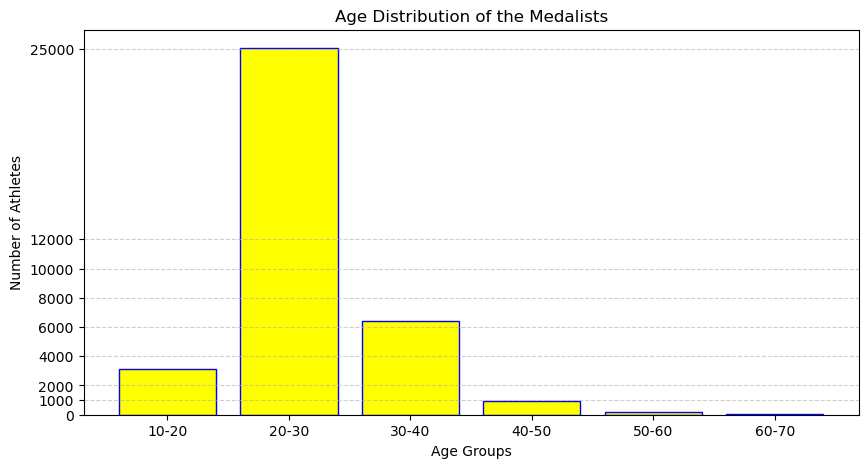

In [ ]:
plt.figure(figsize=(10,5))
bins = [10, 20, 30, 40, 50, 60, 70]
counts, edges, patches = plt.hist(
    df_medals['Age'].dropna(),
    bins=bins,
    color='yellow',
    edgecolor='blue',
    rwidth=0.8
)

bin_labels = ['10-20','20-30','30-40','40-50','50-60','60-70']
plt.xticks(ticks=edges[:-1]+5, labels=bin_labels) 
ticks = [0,1000,2000,4000,6000,8000,10000,12000,25000]
plt.yticks(ticks)
plt.title('Age Distribution of the Medalists')
plt.xlabel('Age Groups')
plt.ylabel('Number of Athletes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig('plots/age_distribution_of_medalists',dpi=400,bbox_inches='tight')
plt.show()
